## Time Series Analysis and Forecasting on sales data

### Problem Statement : 
We are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

### Data :
Anonymized information about the 45 stores, indicating the type and size of store. The data contains additional data related to the store, department, and regional activity for the given dates.

    Store - the store number
    Date - the week
    Temperature - average temperature in the region
    Fuel_Price - cost of fuel in the region
    MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
    CPI - the consumer price index
    Unemployment - the unemployment rate
    IsHoliday - whether the week is a special holiday week



Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

    Store - the store number
    Dept - the department number
    Date - the week
    Weekly_Sales -  sales for the given department in the given store
    IsHoliday - whether the week is a special holiday week


### The Task

Predict the department-wide sales for each store for the following year.

Model the effects of markdowns on holiday weeks.

Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [2]:
sales = pd.read_csv('sales_data.csv')

In [3]:
sales.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [4]:
sales.shape

(421570, 17)

In [5]:
sales.tail()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,421565,45,98,2012-09-28,508.37,False,18.266667,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,118221
421566,421566,45,98,2012-05-10,628.10,False,18.272222,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,118221
421567,421567,45,98,2012-12-10,1061.02,False,12.483333,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,118221
421568,421568,45,98,2012-10-19,760.01,False,13.594444,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,118221
421569,421569,45,98,2012-10-26,1076.80,False,14.916667,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,1,118221


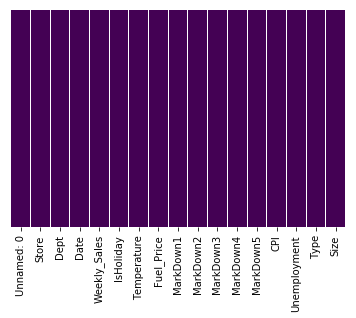

In [6]:
sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Unnamed: 0      421570 non-null int64
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null int64
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(5), object(1)
memory usage: 51.9+ MB


In [8]:
sales.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,210784.500000,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,121696.920828,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,105392.250000,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,210784.500000,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,316176.750000,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,421569.000000,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [9]:
remove = ['Unnamed: 0']
sales.drop(remove,axis=1,inplace=True)
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [10]:
print("Maximum Weekly Sales",sales['Weekly_Sales'].max())
print("Minimum Weekly Sales",sales['Weekly_Sales'].min())


Maximum Weekly Sales 693099.36
Minimum Weekly Sales -4988.94


In [11]:
print("Maximum Temperature :",sales['Temperature'].max())
print("Minimum Temperature :",sales['Temperature'].min())

Maximum Temperature : 37.85555555555555
Minimum Temperature : -18.922222222222224


In [12]:
sales['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [13]:
print("Departments : ")
dept = sales['Dept'].unique()
print(dept)
print("-"*30)
print("Number of departments :",len(dept))

Departments : 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
------------------------------
Number of departments : 81


In [14]:
print(sales['Type'].value_counts())

0    215478
1    163495
2     42597
Name: Type, dtype: int64


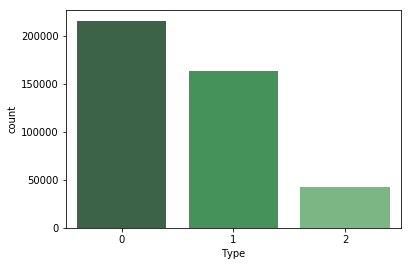

In [15]:
sns.countplot(x="Type",data=sales,palette="Greens_d")

In [16]:
sales['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

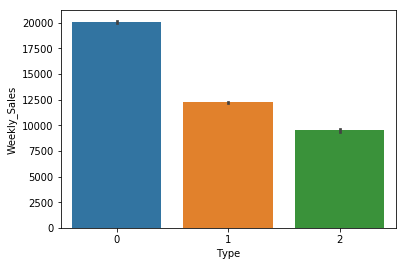

In [17]:
sns.barplot(x="Type",y="Weekly_Sales",data=sales)

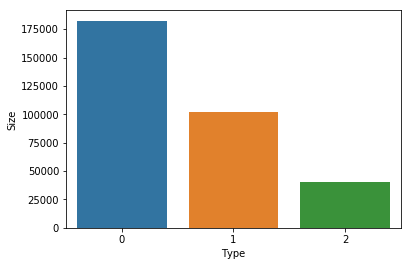

In [18]:
sns.barplot(x="Type",y="Size",data=sales)

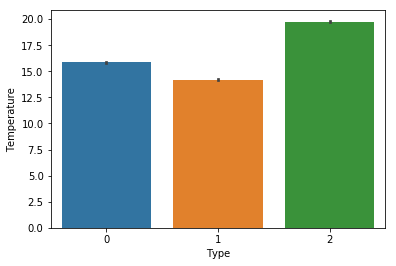

In [19]:
sns.barplot(x="Type",y="Temperature",data=sales)

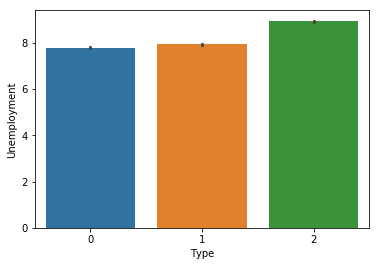

In [20]:
sns.barplot(x="Type",y="Unemployment",data=sales)

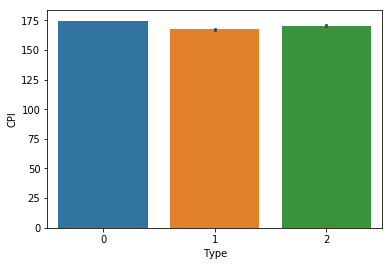

In [21]:
sns.barplot(x="Type",y="CPI",data=sales)

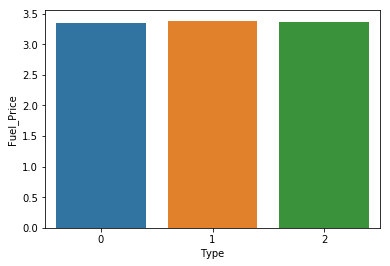

In [22]:
sns.barplot(x="Type",y="Fuel_Price",data=sales)

[]

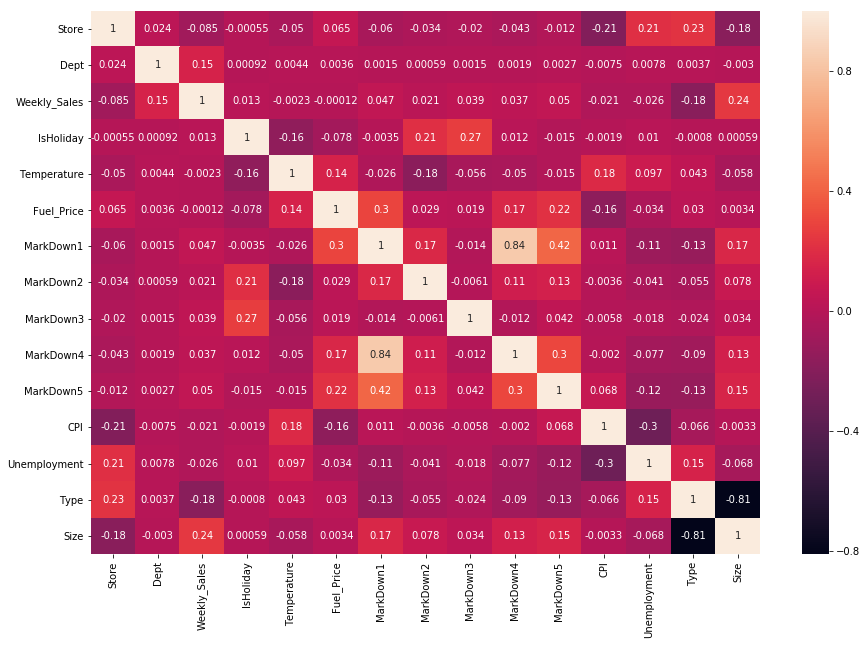

In [23]:
corr = sales.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

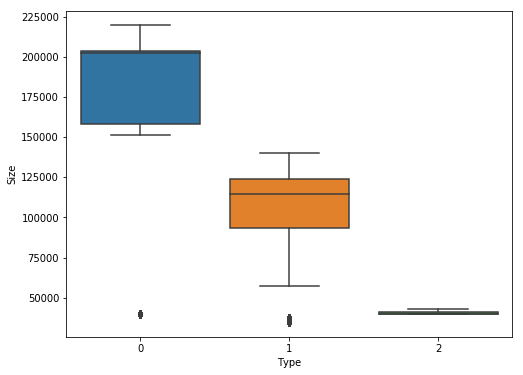

In [24]:
type_size = pd.concat([sales['Type'], sales['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=type_size)

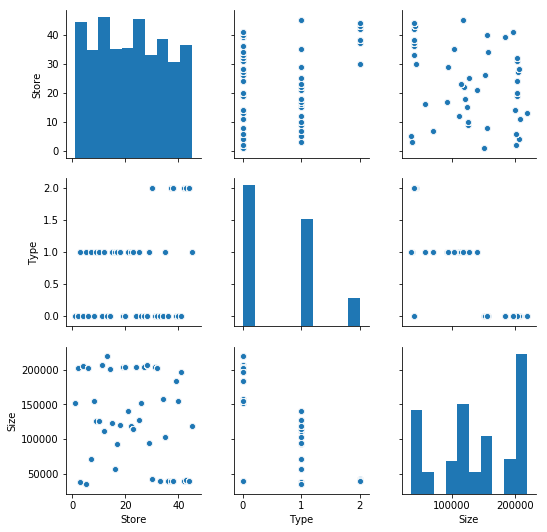

In [25]:
sns.pairplot(sales, vars = ['Store','Type','Size'])

In [26]:
cols = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Store','Dept','IsHoliday']
sales.drop(cols,axis=1,inplace=True)

In [27]:
sales.head()

,Date,Weekly_Sales
0,2010-05-02,24924.50
1,2010-12-02,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-05-03,21827.90


In [28]:
sales.shape

(421570, 2)

In [29]:
sales.to_csv(r'C:\Users\NEELESH\Desktop\Time Series Analysis\cleaned_sales_data.csv', index = False)

In [30]:
sales = pd.read_csv('cleaned_sales_data.csv',parse_dates=['Date'],index_col="Date")

In [31]:
sales.head()

,Weekly_Sales
Date,
2010-05-02,24924.50
2010-12-02,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-05-03,21827.90


###### Dates of prominent holidays from '2010-01-10' to '2012-12-10': 
Super Bowl - 2010-02-07, 2011-02-07, 2012-02-06

Labor Day - 2010-09-06, 2011-09-05, 2012-09-03

Thanksgiving - 2010-11-25, 2011-11-24, 2012-11-22

Christmas - 2010-12-25, 2011-12-25, 2012-12-25

In [32]:
a = sales["2010-02-01":"2010-02-07"].shape
b = sales["2011-02-01":"2011-02-07"].shape
c = sales["2012-01-31":"2012-02-06"].shape
a[0] + b[0] + c[0]
print("Number of purchases in the Super Bowl week is",a[0] + b[0] + c[0])

Number of purchases in the Super Bowl week is 8856


In [33]:
#Labor Day - 2010-09-06, 2011-09-05, 2012-09-03
a = sales["2010-08-31":"2010-09-06"].shape
b = sales["2011-08-29":"2011-09-05"].shape
c = sales["2012-08-27":"2012-02-03"].shape
a[0] + b[0] + c[0]
print("Number of purchases in the Labor Day week is",a[0] + b[0] + c[0])

Number of purchases in the Labor Day week is 2951


In [34]:
a = sales["2010-11-18":"2010-11-25"].shape
b = sales["2011-11-17":"2011-11-24"].shape
c = sales["2012-11-15":"2012-11-22"].shape
print("Number of purchases in the Thanksgiving week is",a[0] + b[0] + c[0])

Number of purchases in the Thanksgiving week is 5877


In [35]:
#Christmas - 2010-12-25, 2011-12-25, 2012-12-25
a = sales["2010-12-18":"2010-12-25"].shape
b = sales["2011-12-18":"2011-12-25"].shape
c = sales["2012-12-18":"2012-12-25"].shape
a[0] + b[0] + c[0]
print("Number of purchases in the Christmas week is",a[0] + b[0] + c[0])

Number of purchases in the Christmas week is 5983


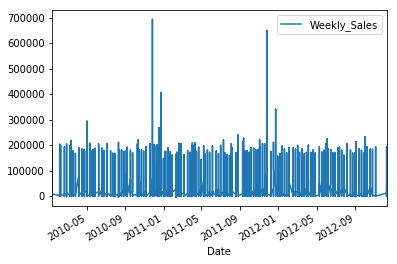

In [36]:
sales.plot()

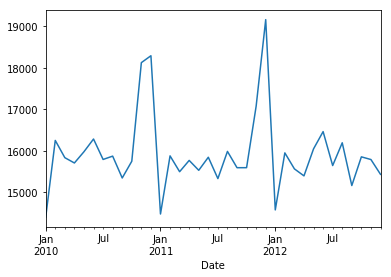

In [37]:
sales.Weekly_Sales.resample('M').mean().plot()

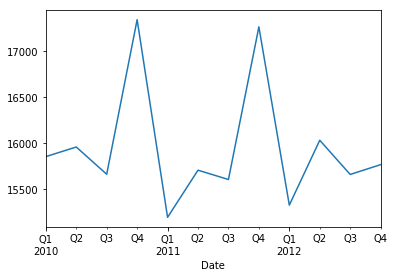

In [38]:
sales.Weekly_Sales.resample('Q').mean().plot()

In [39]:
sales = sales.Weekly_Sales.resample('M').mean()

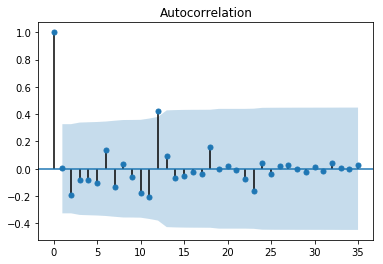

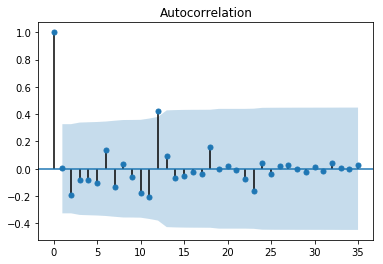

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [41]:
sales.head()

Date
2010-01-31    14391.780535
2010-02-28    16244.436211
2010-03-31    15828.833079
2010-04-30    15701.015586
2010-05-31    15971.989499
Freq: M, Name: Weekly_Sales, dtype: float64

In [42]:
sales.shift(1)

Date
2010-01-31             NaN
2010-02-28    14391.780535
2010-03-31    16244.436211
2010-04-30    15828.833079
2010-05-31    15701.015586
2010-06-30    15971.989499
2010-07-31    16278.409330
2010-08-31    15785.689680
2010-09-30    15866.055025
2010-10-31    15339.655205
2010-11-30    15742.806495
2010-12-31    18118.582008
2011-01-31    18285.014095
2011-02-28    14471.611234
2011-03-31    15872.183056
2011-04-30    15490.811225
2011-05-31    15762.759190
2011-06-30    15524.557693
2011-07-31    15839.296649
2011-08-31    15324.714393
2011-09-30    15979.696402
2011-10-31    15587.117990
2011-11-30    15587.928852
2011-12-31    17069.858089
2012-01-31    19154.569311
2012-02-29    14570.279140
2012-03-31    15944.362413
2012-04-30    15558.979707
2012-05-31    15390.168452
2012-06-30    16040.929182
2012-07-31    16456.816992
2012-08-31    15638.946864
2012-09-30    16187.597099
2012-10-31    15157.303934
2012-11-30    15848.941251
2012-12-31    15784.015806
Freq: M, Name: Weekly_S

In [43]:
sales_diff = sales.diff(periods=1)

In [44]:
sales_diff = sales_diff[1:]
sales_diff.head()

Date
2010-02-28    1852.655676
2010-03-31    -415.603131
2010-04-30    -127.817493
2010-05-31     270.973913
2010-06-30     306.419831
Freq: M, Name: Weekly_Sales, dtype: float64

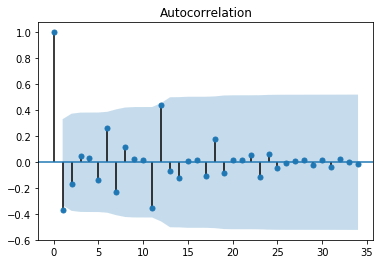

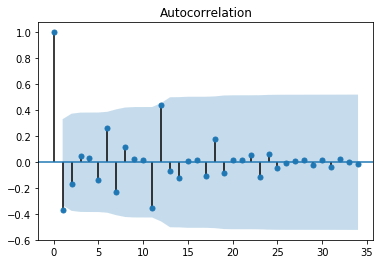

In [45]:
plot_acf(sales_diff)

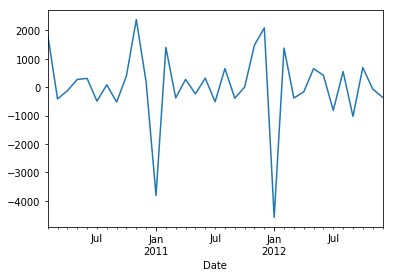

In [46]:
sales_diff.plot()

In [47]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [48]:
train.size

27

In [49]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [50]:
predictions = model_ar_fit.predict(start=26,end=36)

In [51]:
test

array([15558.97970735, 15390.16845207, 16040.92918151, 16456.81699161,
       15638.94686351, 16187.59709893, 15157.30393441, 15848.94125053,
       15784.01580558, 15427.59673913])

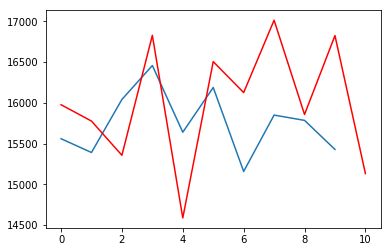

In [52]:
plt.plot(test)
plt.plot(predictions,color='red')

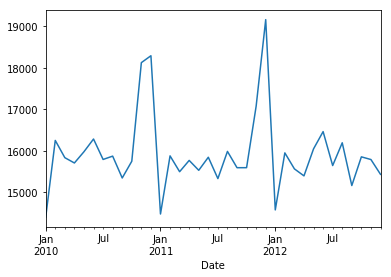

In [53]:
sales.plot()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(2, 2, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

444.0351576221012


In [56]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [57]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 456.6247842829089
(0, 0, 1) 458.62440804789406
(0, 0, 2) 457.08530419597207
(0, 0, 3) 457.23069259368793
(0, 0, 4) 459.2218058110335
(0, 0, 5) nan
(0, 0, 6) 529.0402618625942
(0, 1, 0) 457.5870625752309
(0, 1, 1) 445.82225407686605
(0, 1, 2) 447.76766657359906
(0, 2, 0) 465.5075599324358
(0, 2, 1) 446.1627292260166
(1, 0, 0) 458.6245752233169
(1, 1, 0) 455.9210299958068
(1, 2, 0) 458.434540025576
(2, 0, 0) 459.37592446080083
(2, 0, 1) 457.0837190513648
(2, 1, 0) 454.27715708938547
(2, 2, 0) 452.8947899531146
(2, 2, 1) 444.0351576221012
(3, 0, 0) 460.9401799652044
(3, 1, 0) 453.72304369016166
(3, 2, 0) 450.07010427158605
(3, 2, 1) 444.3569021862487
(4, 0, 0) 462.8037008341132
(4, 1, 0) 455.1578223428757
(4, 1, 1) 452.45908942304686
(4, 2, 0) 451.28425631385346
(4, 2, 1) 446.12526792902486
(5, 0, 0) 463.8740230335996
(5, 1, 0) 454.37735291732537
(5, 2, 0) 448.53495389378463
(6, 0, 0) 465.79739467747555
(6, 1, 0) 456.3706758955881
(7, 0, 0) 465.82918464966707
(8, 0, 0) 467.79083

In [58]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([15950.97732188, 16461.10056224, 16881.98564974, 15836.2328284 ,
       16748.31254623, 16454.62199548, 16562.93937244, 15761.95243732,
       16785.36139413, 16048.52887149])

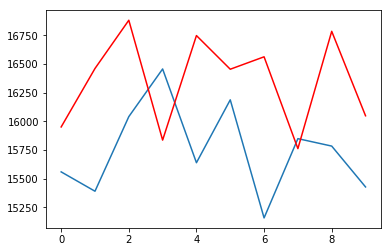

In [59]:
plt.plot(test)
plt.plot(predictions,color='red')

In [60]:
mean_squared_error(test,predictions)

706668.0653103334